# Vision Transformers Using Keras

### A CNN-Vision Transformer (ViT) hybrid image classification model

### 1. Importing Necessary Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import os 
import time
import random
import numpy as np  
from tqdm import tqdm
import matplotlib.pyplot as plt
import datetime as datetime


os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.callbacks import ModelCheckpoint

gpu_list = tf.config.list_physical_devices('GPU')
device = "gpu" if gpu_list != [] else "cpu"
print(f"Device available for training: {device}")

Device available for training: cpu


### 2. Model and Dataset Path

In [3]:
data_dir = os.path.join(os.getcwd(), "..", "models")

keras_model_name = "cnn_model_keras_best.model.keras"
keras_model_path = os.path.join(data_dir, keras_model_name)

dataset_path = os.path.join(os.getcwd(), "..", "data", "images_dataSAT")
print(dataset_path)

/home/ashmin/Projects/land-classification-using-deep-learning/notebooks/../data/images_dataSAT


### 3. Load Model

In [4]:
cnn_model = load_model(keras_model_path)
cnn_model.summary()

#Name of the layer from the CNN model for feature extraction
feature_layer_name = "batch_normalization_5"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 512)      │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 1024)     │    13,108,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 1, 1, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │             

 Total params: 61,034,501 (232.83 MB)

 Trainable params: 20,340,801 (77.59 MB)

 Non-trainable params: 12,096 (47.25 KB)

 Optimizer params: 40,681,604 (155.19 MB)

### 4. Custom positional embedding layer

In [5]:
# Positional embedding that Keras can track
@tf.keras.utils.register_keras_serializable(package="Custom")
class AddPositionEmbedding(layers.Layer):
    def __init__(self, num_patches, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.num_patches = num_patches
        self.embed_dim   = embed_dim
        self.pos = self.add_weight(
            name="pos_embedding",
            shape=(1, num_patches, embed_dim),
            initializer="random_normal",
            trainable=True)

    def call(self, tokens):
        return tokens + self.pos

    def get_config(self):
        config = super().get_config()
        config.update({
            "num_patches": self.num_patches,
            "embed_dim":   self.embed_dim,
        })
        return {**config}

### 5. Transformer block implementation

In [6]:
# One Transformer encoder block
@tf.keras.utils.register_keras_serializable(package="Custom")
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads=8, mlp_dim=2048, dropout=0.1, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.mlp_dim   = mlp_dim
        self.dropout   = dropout
        self.mha  = layers.MultiHeadAttention(num_heads, key_dim=embed_dim)
        self.norm1 = layers.LayerNormalization(epsilon=1e-6)
        self.norm2 = layers.LayerNormalization(epsilon=1e-6)
        self.mlp = tf.keras.Sequential([
            layers.Dense(mlp_dim, activation="gelu"),
            layers.Dropout(dropout),
            layers.Dense(embed_dim),
            layers.Dropout(dropout)
        ])

    def call(self, x):
        x = self.norm1(x + self.mha(x, x))
        return self.norm2(x + self.mlp(x))

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim":  self.embed_dim,
            "num_heads":  self.num_heads,
            "mlp_dim":    self.mlp_dim,
            "dropout":    self.dropout,
        })
        return {**config}


### 6. Hybrid model builder function

In [7]:
def build_cnn_vit_hybrid(
        cnn_model,
        feature_layer_name,
        num_transformer_layers=4,
        num_heads=8,
        mlp_dim=2048,
        num_classes=2):
    # 1. Freeze or fine-tune the CNN as you prefer
    cnn_model.trainable = False      # set True to fine-tune
    
    # 2. Feature extractor up to the chosen layer
    features = cnn_model.get_layer(feature_layer_name).output
    H, W, C = features.shape[1], features.shape[2], features.shape[3]
    
    # 3. Flatten spatial grid → tokens  &  add positional encoding
    x = layers.Reshape((H * W, C))(features) 
    x = AddPositionEmbedding(H * W, C)(x)

    # 4. Stack ViT encoder blocks
    for _ in range(num_transformer_layers):
        x = TransformerBlock(C, num_heads, mlp_dim)(x)

    # 5. Token pooling & classification head
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    return Model(cnn_model.layers[0].input, outputs, name="CNN_ViT_hybrid")


### 7. Data generator configuration

In [8]:
# Image data generator with data augmentation
img_w, img_h = 64, 64
n_channels = 3
batch_size = 4
num_classes = 2


datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=40, 
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode="nearest",
                             validation_split=0.2
                            )

train_gen = datagen.flow_from_directory(dataset_path,
                                        target_size = (img_w, img_h),
                                        batch_size= batch_size,
                                        class_mode="categorical",
                                        subset="training",
                                        shuffle=True
                                       )

val_gen = datagen.flow_from_directory(dataset_path,
                                      target_size =(img_w, img_h),
                                      batch_size = batch_size, 
                                      class_mode="categorical",
                                      subset="validation",
                                      shuffle=True
                                     )


Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.


### 8. Model checkpoint setup

This code cell configures a `ModelCheckpoint` callback for saving the best model weights during training.

In [9]:
model_name = os.path.join(os.getcwd(), "..", "models", "keras_cnn_vit.model.keras")

# Save only weights to overcome the serialization issues with the hybrid model. The full model can be saved using the model architecture and weights.
checkpoint_cb = ModelCheckpoint(filepath=model_name,
                                save_weights_only=False,  # Set to True to save only weights
                                monitor='val_loss',      # or 'val_accuracy', 'val_loss'
                                mode='min',              # 'min' for loss, 'max' for accuracy
                                save_best_only=True,
                                verbose=1
                                
                               )

### 9. Model building and compilation

In [10]:
num_classes = train_gen.num_classes
# Build the hybrid model
hybrid_model = build_cnn_vit_hybrid(
        cnn_model,
        feature_layer_name=feature_layer_name,
        num_transformer_layers=4,
        num_heads=8,
        mlp_dim=2048,
        num_classes=train_gen.num_classes)

# Compile the model
hybrid_model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
                     loss="categorical_crossentropy",
                     metrics=["accuracy"],
                    )

### 10. Model shape validation
This code cell performs the validation step to ensure the hybrid model produces outputs with the correct shape and dimensions.

If the output shape doesn't match expectations, it indicates potential issues in the hybrid architecture, such as incorrect reshaping operations, wrong number of classes configuration, or problems in the CNN-to-transformer transition. This simple test can save significant debugging time by catching architectural issues immediately after model construction.

In [11]:
# Ensure end-to-end shapes line up
dummy = tf.random.normal([1, img_w, img_h, n_channels])
pred  = hybrid_model(dummy)
print("Logits shape:", pred.shape)   # should be (1, num_classes)


Logits shape: (1, 2)


### 11. Training

In [12]:
fit = hybrid_model.fit(train_gen,
                       epochs=3,
                       validation_data=val_gen,
                       callbacks=[checkpoint_cb],
                       steps_per_epoch = 128
                        )

Epoch 1/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9343 - loss: 0.5522
Epoch 1: val_loss improved from None to 0.12997, saving model to /home/ashmin/Projects/land-classification-using-deep-learning/notebooks/../models/keras_cnn_vit.model.keras
128/128 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.9609 - loss: 0.4484 - val_accuracy: 0.9967 - val_loss: 0.1300
Epoch 2/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9953 - loss: 0.0687
Epoch 2: val_loss did not improve from 0.12997
128/128 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9961 - loss: 0.0456 - val_accuracy: 0.9942 - val_loss: 0.1517
Epoch 3/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 933ms/step - accuracy: 0.9970 - loss: 0.0695
Epoch 3: val_loss improved from 0.12997 to 0.08189, saving model to /home/ashmin/Projects/land-classification-using-deep-learning/notebooks/../models/keras_cnn_vit.model.keras
128/128 ━━━━━━━━━━━━━━━━━━━━ 155s 1s/step - accuracy: 0.9961 - loss: 0.0760 - val_accuracy: 0.9942 - val_loss: 0.


### 12. Training results visualization

***Importance:***
These plots enable several important analyses:
1. **Overfitting detection:** Diverging training and validation curves indicate overfitting
2. **Convergence assessment:** Plateauing curves suggest training completion
3. **Learning rate evaluation:** Oscillating curves may indicate learning rate issues
4. **Model performance:** Final accuracy and loss values indicate overall model quality


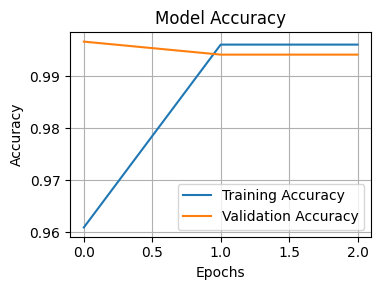

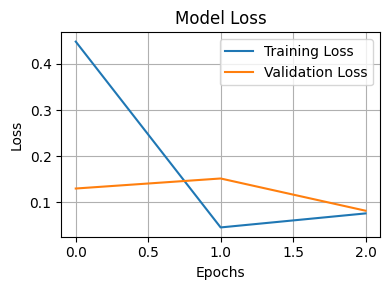

In [13]:
# Create a figure with a subplot
fig_w, fig_h = 4,3
fig, axs = plt.subplots(figsize=(fig_w, fig_h ))

# Plot Accuracy on the first subplot
axs.plot(fit.history['accuracy'], label='Training Accuracy')
axs.plot(fit.history['val_accuracy'], label='Validation Accuracy')
axs.set_title('Model Accuracy')
axs.set_xlabel('Epochs')
axs.set_ylabel('Accuracy')
axs.legend()
axs.grid(True)

plt.tight_layout()
plt.show()


## You can use this cell to type the code to complete the task.

fig, axs = plt.subplots(figsize=(fig_w, fig_h ))

# Plot Loss on the second subplot
axs.plot(fit.history['loss'], label='Training Loss')
axs.plot(fit.history['val_loss'], label='Validation Loss')
axs.set_title('Model Loss')
axs.set_xlabel('Epochs')
axs.set_ylabel('Loss')
axs.legend()
axs.grid(True)

plt.tight_layout()
plt.show()